# Particle Resolved Coagulation

## Introduction

In aerosol science, understanding particle-particle interactions is crucial for predicting the evolution of particle size distributions. One such interaction is **coagulation**, where two particles collide and merge into a larger particle. Accurately modeling coagulation at the level of individual particles is known as the **particle-resolved method**.

The particle-resolved method tracks each particle individually, considering its unique properties and interactions. This method provides the most detailed representation of aerosol dynamics, making it ideal for cases where precision is paramount, such as in cloud microphysics or laboratory-scale studies.

However, this approach is computationally intensive because it requires simulating every individual particle and its interactions. Unlike the **super droplet method**, which uses statistical representations to reduce computational load, the direct particle-resolved method does not aggregate particles into larger groups. Instead, every particle is treated independently, ensuring that every interaction is explicitly modeled.

This notebook provides a step-by-step guide to simulating coagulation using a pure particle-resolved approach, demonstrating how individual particles evolve over time without any simplifications or approximations in particle grouping.

## Setup and Imports

We'll start by importing the necessary libraries and setting up the environment.

In [1]:
# %% particle resolved coagulation example
import numpy as np  # For numerical operations and array manipulations
import matplotlib.pyplot as plt  # For plotting graphs and visualizations

# Import specific modules from the particula package
from particula.next.dynamics.coagulation import brownian_kernel
from particula.next.dynamics.coagulation import particle_resolved_method

from particula.next.particles.properties.lognormal_size_distribution import (
    lognormal_sample_distribution,
)

## Generating a Lognormal Spacing

In this section, we generate a sample particle size distribution following a lognormal distribution. The lognormal distribution is commonly used in aerosol science to describe particle size distributions. 

## Coagulation Kernel

We also calculate the Brownian coagulation kernel for these particles, which quantifies the probability of coagulation between particles of different sizes.

## Random seed

We set a random seed to ensure reproducibility of the results.

In [2]:
# lognormal spacing

radius_bins = np.logspace(
    -9, -6, num=20
)  # Define the radius bins for the distribution
mass_bins = (
    4 / 3 * np.pi * radius_bins**3 * 1000
)  # Calculate the mass of the particles in the bins

kernel = brownian_kernel.brownian_coagulation_kernel_via_system_state(
    radius_particle=radius_bins,
    mass_particle=mass_bins,
    temperature=298.15,
    pressure=101325,
)  # Calculate the Brownian coagulation kernel for the radius bins

random_generator = np.random.default_rng(12345)

## Sampling the Particle Distribution

We then sample particles from the lognormal distribution. These particles will be sorted by size to prepare for the coagulation step.

In [3]:
# %% sample particle distribution
particle_radius = lognormal_sample_distribution(
    mode=np.array([1e-8, 1e-7]),
    geometric_standard_deviation=np.array([1.4, 1.4]),
    number_of_particles=np.array([5000, 1000]),
    number_of_samples=1000,
)
particle_radius = np.sort(particle_radius)
particles_original = particle_radius.copy()

## Coagulation Step Particle-Resolved Method

In the coagulation step, particles collide and merge over a given time step. The super droplet method efficiently simulates this process by adjusting the particle sizes and concentrations based on the calculated kernel and the specified volume and time step.

In [4]:
# %% Coagulation step

delta_t = 100  # time step in seconds
total_number_concentration = 1000000 * 1e6  # particles per m^3
total_number_tracked = len(particle_radius)
volume_sim = total_number_tracked / total_number_concentration

particle_radius, loss, gain = particle_resolved_method.coagulation_step(
    particle_radius=particle_radius,
    kernel=kernel,
    kernel_radius=radius_bins,
    volume=volume_sim,
    time_step=delta_t,
    random_generator=random_generator,
)

print(f"Final number of particles: {np.sum(particle_radius>0)}")

Final number of particles: 705


## Plotting the New Distribution

Finally, we plot the particle size distribution before and after coagulation. This visualization helps us understand the effect of the coagulation process on the particle size distribution.


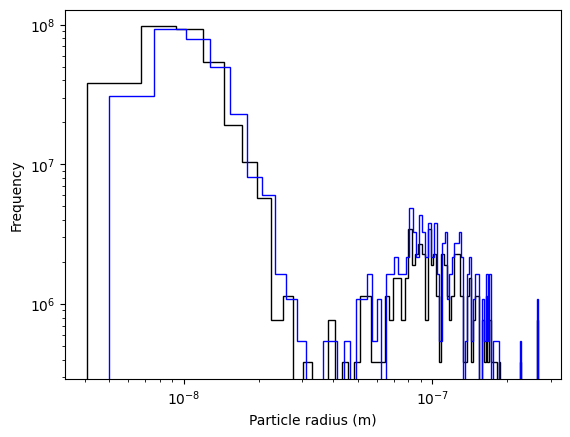

In [5]:
# %% plot new distribution
fig, ax = plt.subplots()
ax.hist(
    particles_original, bins=100, histtype="step", color="black", density=True
)
ax.hist(
    particle_radius[particle_radius>0], bins=100, histtype="step", color="blue", density=True
)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Particle radius (m)")
ax.set_ylabel("Frequency")
plt.show()

## Plotting the Loss and Gain of Particles

We also plot the loss and gain of particles due to coagulation. This visualization provides insights into the coagulation process and how it affects the particle population.

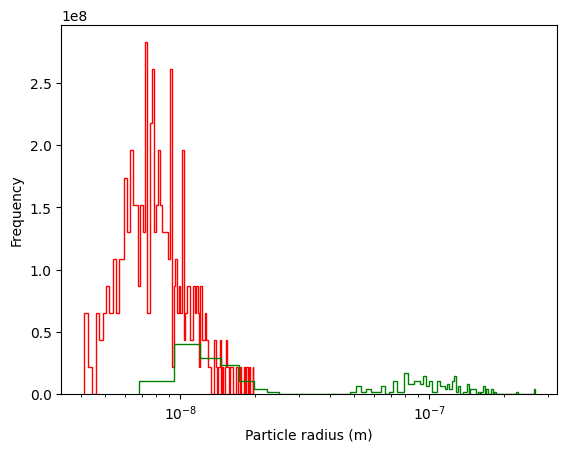

In [6]:
fig, ax = plt.subplots()
ax.hist(loss[loss>0], bins=100, histtype="step", color="red", density=True)
ax.hist(gain[gain>0], bins=100, histtype="step", color="green", density=True)
ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("Particle radius (m)")
ax.set_ylabel("Frequency")
plt.show()

## Conclusion

This notebook demonstrated the use of the particle resolved coagulation method to simulate particle coagulation in a computationally efficient manner.
